In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import Normalizer

In [4]:
# Get the data
df = pd.read_csv(r'C:\Users\parag\Desktop\ironhack\lab\week2\lab-customer-analysis-round-7\files_for_lab\csv_files\marketing_customer_analysis.csv')
df.columns = df.columns.str.lower().str.replace(' ','_')
df.drop_duplicates()
df = df.set_index('customer')
df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [6]:
# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals
numerical = df.select_dtypes(include=np.number)
categoricals = df.select_dtypes(include=np.object)
print('Numerical Data into dataframe:')
display(numerical.head())
print('Categorical Data into dataframe:')
display(categoricals.head())


Numerical Data into dataframe:


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


Categorical Data into dataframe:


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


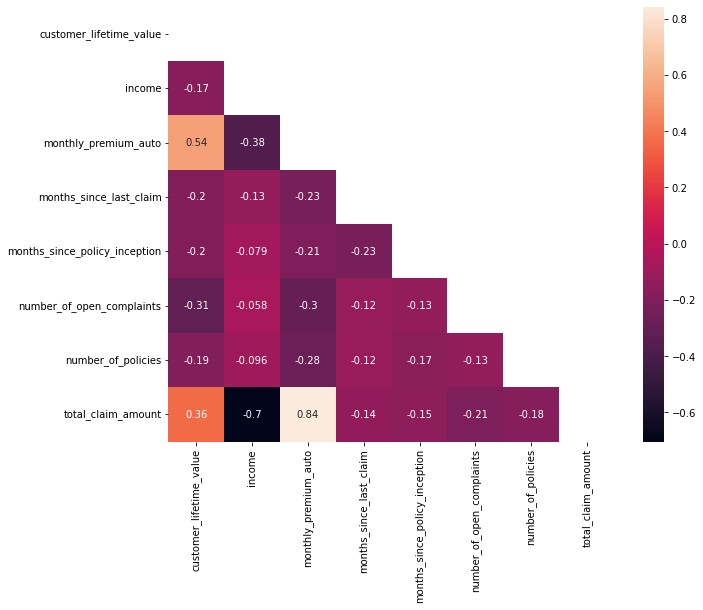

In [10]:
#correlations 
corr_data = numerical.corr() # With standard method 'pearson'
corr_matrix = corr_data.corr()
#Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True) 
plt.show()

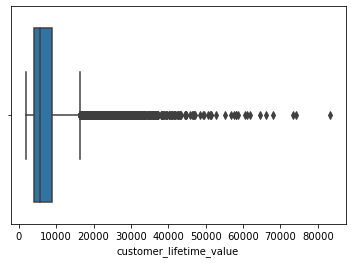

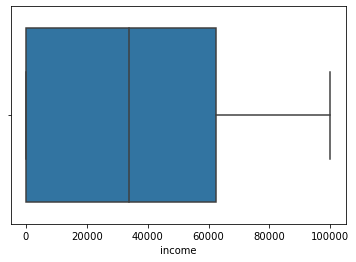

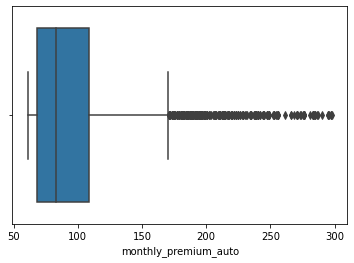

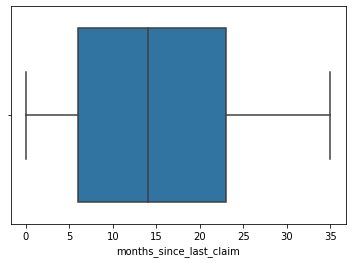

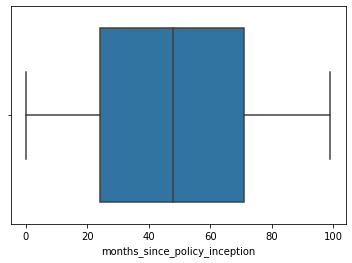

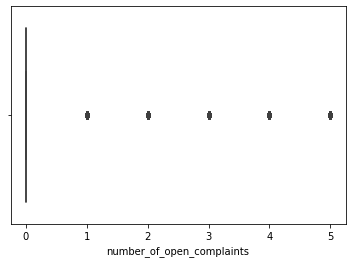

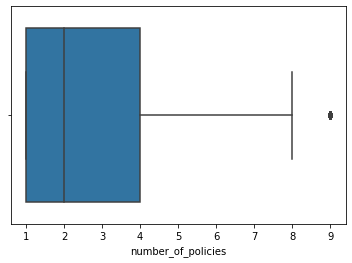

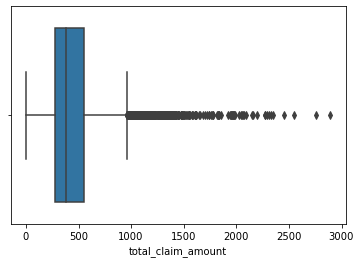

In [11]:
# check the outliers
for col in df.select_dtypes(np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [14]:
#removiung outliers
for col in ['customer_lifetime_value', 'monthly_premium_auto', 'number_of_policies','total_claim_amount']:
    iqr = np.percentile(numerical[col],75) - np.percentile(numerical[col],25) 
    upper_limit = np.percentile(numerical[col],75) + 1.5*iqr
    lower_limit = np.percentile(numerical[col],25) - 1.5*iqr
    numerical_wo = numerical[(numerical[col] > lower_limit) & (numerical[col] < upper_limit)]
numerical_wo.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
OC83172,8256.297800,62902,69,14,94,0,2,159.383042


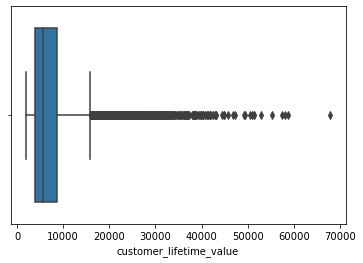

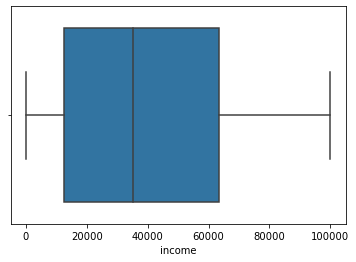

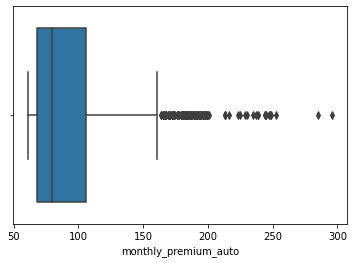

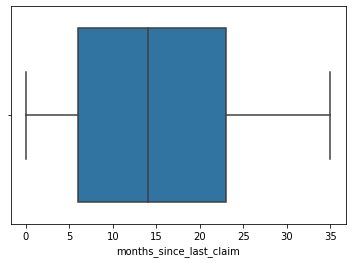

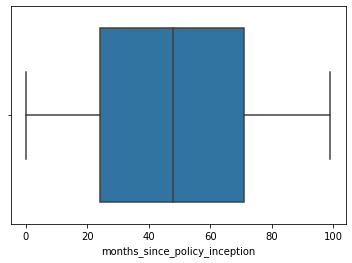

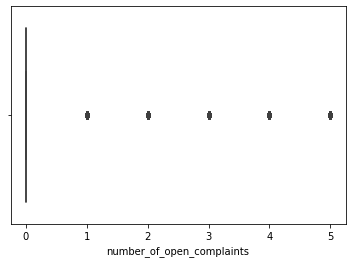

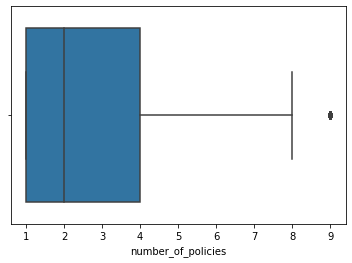

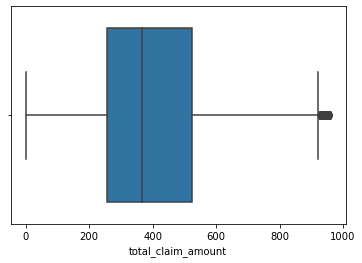

In [15]:
# let's check for outliers after removeing outliers
for col in numerical_wo.columns:
    sns.boxplot(x=numerical_wo[col])
    plt.show()

In [19]:
#Normalize numarical
transformer = Normalizer() # init Normalizer
transformer.fit(numerical_wo) # fit the training data
with open('transformer.pkl', 'wb') as file: # save it in a file 
    pickle.dump(transformer, file)

In [20]:
# read transformer object
with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

X_normalized = transformer.transform(numerical_wo)
X_normalized = pd.DataFrame(X_normalized, columns=numerical_wo.columns)

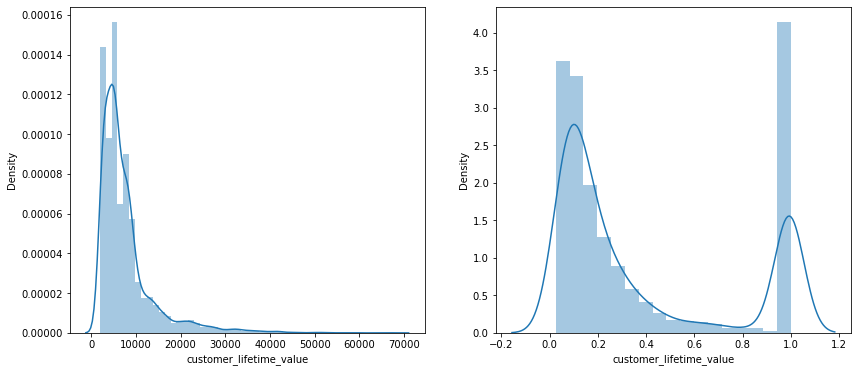

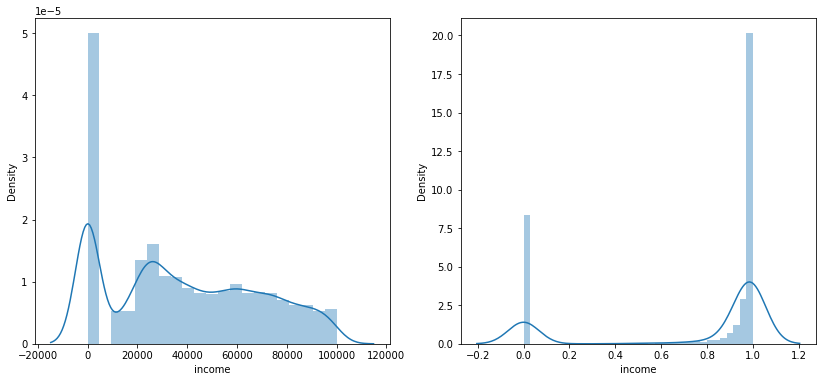

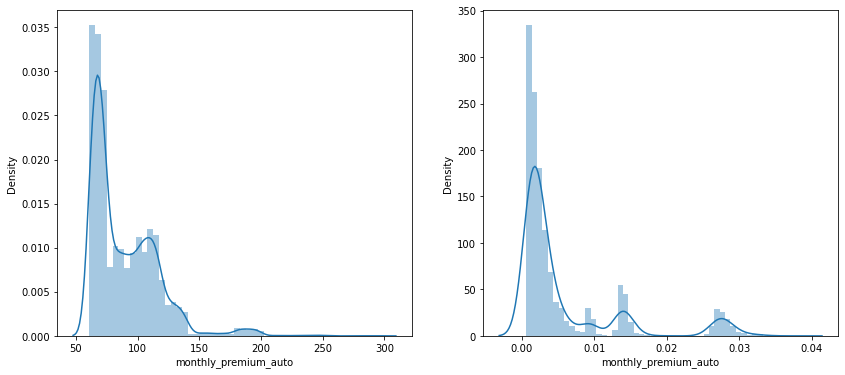

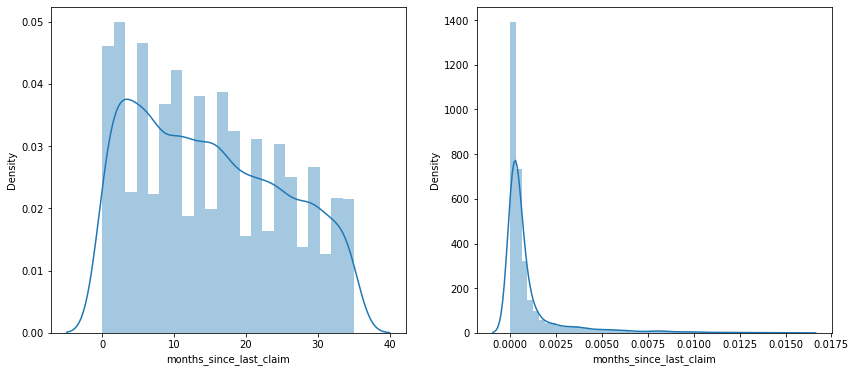

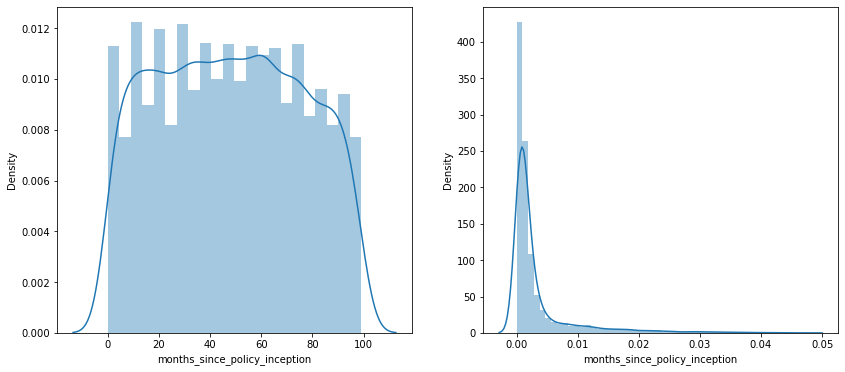

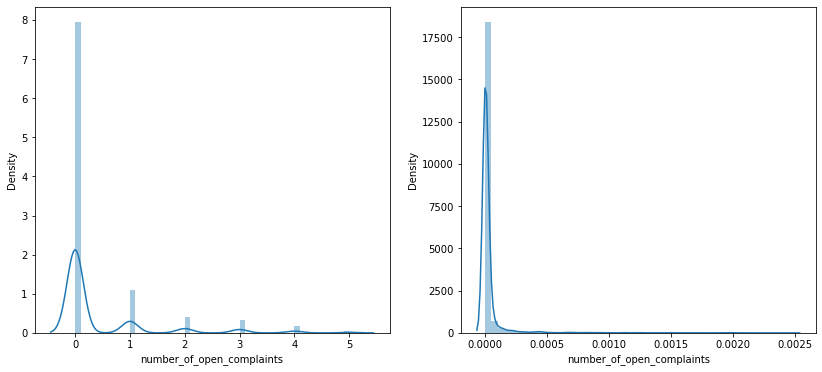

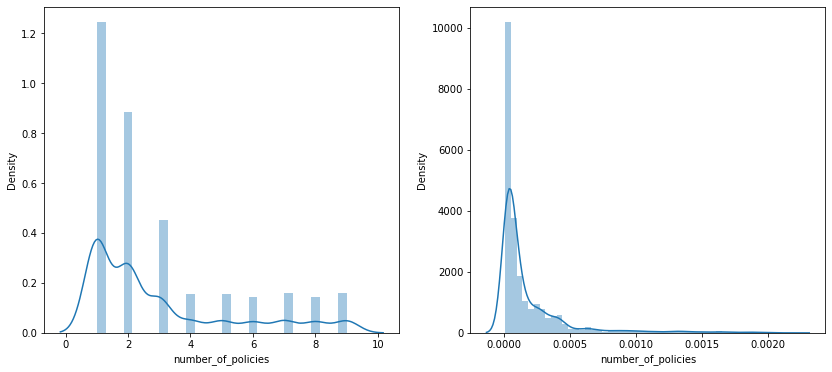

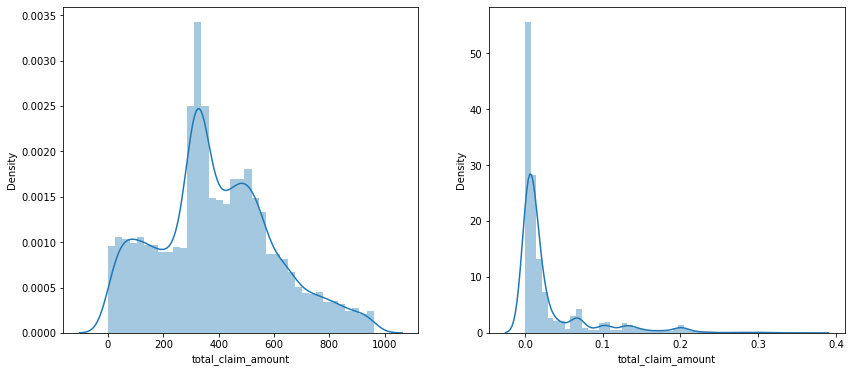

In [21]:
# Print difference between unfiltered data and normalized distributions
for col in X_normalized.columns:
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    sns.distplot(ax=axs[0], a=numerical_wo[col])
    sns.distplot(ax=axs[1], a=X_normalized[col])
    plt.show()

In [22]:
## encoding categorical
df1 = pd.get_dummies(df, drop_first=True) # i'm lazy

In [1]:
#effective_to_date encoding
# X-y split.
X = df1.drop(['total_claim_amount'], axis=1)#effective_to_date is target
y = df1['total_claim_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


NameError: name 'df1' is not defined